In [1]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import tree
import numpy as np

In [2]:
x,y=make_regression(n_samples=700,n_features=2,noise=5)

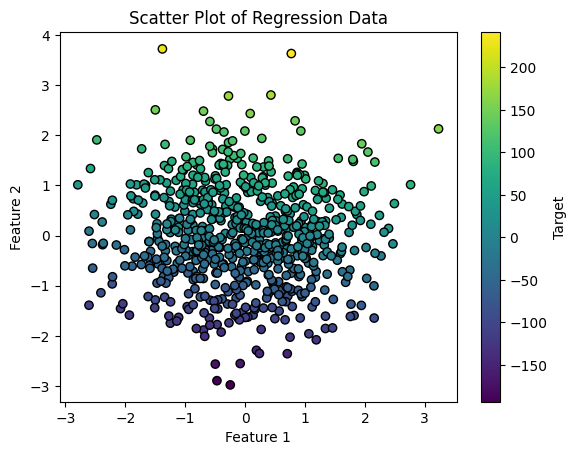

In [3]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.colorbar(label='Target')
plt.title('Scatter Plot of Regression Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [4]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [9]:
param_grid = {
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}



In [10]:
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train)

C:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
180 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python312\Lib\site-packages\sklearn\ensemble\_forest.py", line 373, in fit
    raise ValueError(
ValueError: Some value(s) of y are negative which is not allowed for Poisson regression.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\Python312\Lib\site-packages\sklearn\model_selection\_search.py:952: Us

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [11]:
print("Best Parameters:", grid_search.best_params_)
print("Best Precision:", grid_search.best_score_)

Best Parameters: {'criterion': 'friedman_mse', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Precision: -52.31813147611964


In [12]:
best_model = grid_search.best_estimator_

In [13]:
from sklearn.metrics import mean_squared_error,r2_score
print(f"mean_squared_error={mean_squared_error(y_test,best_model.predict(x_test))}")
print(f"r2_score={r2_score(y_test,best_model.predict(x_test))}")

mean_squared_error=36.78439623018252
r2_score=0.9893720477032871


In [14]:
y_pred=best_model.predict(x_test)

In [15]:
print(y_pred[3])
print(y_test[3])

57.19911137487218
58.04175777402709


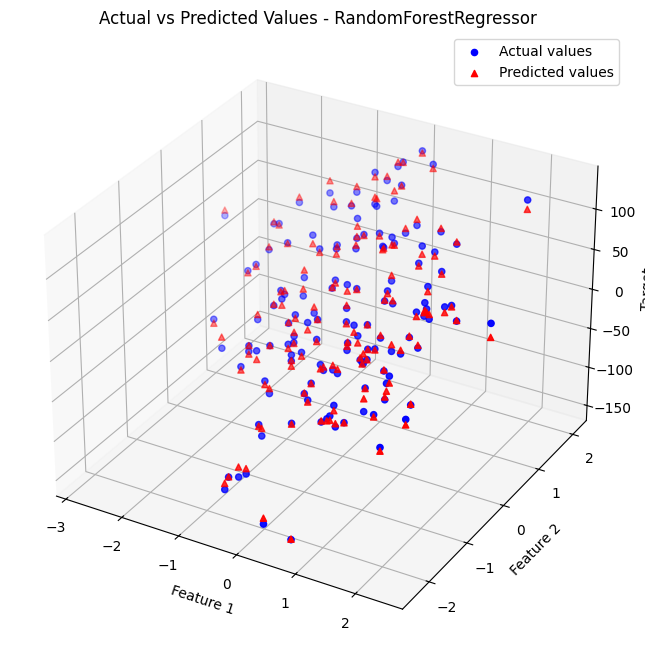

In [16]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_test[:, 0], x_test[:, 1], y_test, c='blue', marker='o', label='Actual values')

ax.scatter(x_test[:, 0], x_test[:, 1], y_pred, c='red', marker='^', label='Predicted values')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
ax.set_title('Actual vs Predicted Values - RandomForestRegressor')
ax.legend()

plt.show()